# Eckstein-Keane-Wolpin

This notebook aims to replicate and extend the sample used by Michael Keane and Kenneth Wolpin to study the career decisions of young men. 

> Keane, M. P. and Wolpin, K. I. (1997). [The career decisions of young men](http://www.journals.uchicago.edu/doi/10.1086/262080). *Journal of Political Economy*, 105(3), 473-522.

The sample is based on the [National Longitudinal Survey of Youth 1979 (NLSY79)](https://www.bls.gov/nls/nlsy79.htm) which is available to download [here](https://github.com/structDataset/career_decisions_data/blob/master/KW_97.raw). 

## Preparations

We first peform some basic preparations to ease further processing.

In [1]:
# flake8-noqa-cell-E402-E114-E116
import sys

sys.path.insert(0, "material/codes")

import pandas as pd

from ekw_ext_analysis import get_prepare_ekw_ext_data
from ekw_ext_analysis import get_choices
from ekw_ext_analysis import get_average_wages
from ekw_ext_analysis import get_initial_schooling
from ekw_ext_analysis import get_initial_schooling_activity
from ekw_ext_analysis import make_transition_matrix
from ekw_ext_analysis import get_df_transition_probabilities

from ekw_ext_plot import plot_sample_size
from ekw_ext_plot import plot_decisions_by_age
from ekw_ext_plot import plot_wage_moments
from ekw_ext_plot import plot_initial_schooling
from ekw_ext_plot import plot_transition_heatmap

from ekw_ext_auxiliary import display_side_by_side

pd.options.display.float_format = "{:,.2f}".format

In [2]:
df = get_prepare_ekw_ext_data("eckstein-keane-wolpin-extended.csv")

## Basic Structure

First we explore the basic structure of the dataset. All individuals enter the model initially at the age 16 and are then followed for a varying number of consecutive years after which they leave the sample between age 47 and 50. Each year, the individual's decision to work in either a white or blue collar occupation, attend school, enroll in the miliary, or remain at home is recorded. If working, the dataset potentially also contains that year's wage as a full-time equivalent. 

In [3]:
df.head(15)

Age  Schooling     Choice      Wage
Identifier Period                                     
6          0        16         11  Schooling       nan
           1        17         12  Schooling       nan
           2        18         13  Schooling       nan
           3        19         14  Schooling       nan
           4        20         15  Schooling       nan
           5        21         16       Home       nan
           6        22         16      White 13,773.24
           7        23         16      White 15,690.82
           8        24         16      White 18,635.95
           9        25         16      White 19,649.71
           10       26         16      White 20,659.24
           11       27         16      White 21,127.90
           12       28         16      White 20,042.24
           13       29         16      White 22,649.11
           14       30         16      White 21,604.74

The sample initially contains 1,384 observations at age 16 and then slowly decreases due to sample attrition. Until the age of 44, the sample includes over 1,000 individuals and only substantially decreases after the age of 47.

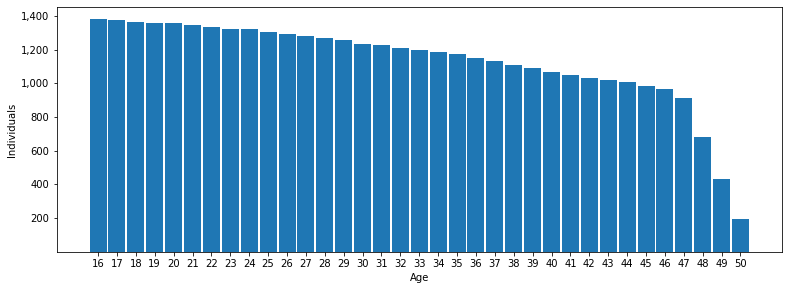

In [4]:
plot_sample_size(df)

## Basic Descriptives

Now we are ready to reproduce some descriptive statistics similar to those presented in the paper.

### Choices

We reproduce the distribution of individuals across the different alternatives as reported in Table 1.

In [5]:
display_side_by_side(get_choices(df)["total"], get_choices(df)["share"])

,Blue,White,Military,Schooling,Home,All
Age,,,,,,
16,57,7,1,1173,146,1384
17,122,12,20,1028,196,1378
18,351,93,72,561,290,1367
19,428,127,106,418,281,1360
20,483,157,113,337,268,1358
21,550,181,104,248,267,1350
22,584,277,88,180,206,1335
23,598,352,67,110,199,1326
24,596,423,71,74,158,1322


In [6]:
pd.crosstab(index=df["Age"], columns=df["Choice"], margins=True)

Choice,Blue,Home,Military,Schooling,White,All
Age,,,,,,
16,57,146,1,1173,7,1384
17,122,196,20,1028,12,1378
18,351,290,72,561,93,1367
19,428,281,106,418,127,1360
20,483,268,113,337,157,1358
21,550,267,104,248,181,1350
22,584,206,88,180,277,1335
23,598,199,67,110,352,1326
24,596,158,71,74,423,1322


As illustrated by the figure below, most individuals are in school at age 16. In the following years, school attendance decreases drastically and working in one of the three occupations becomes the most common choice. While initially more individuals choose working in a blue-collar occupation over working in a white-collar job, this choice distribution changes at the age of 34 after which a larger share of individuals work in the white-collar occupation.

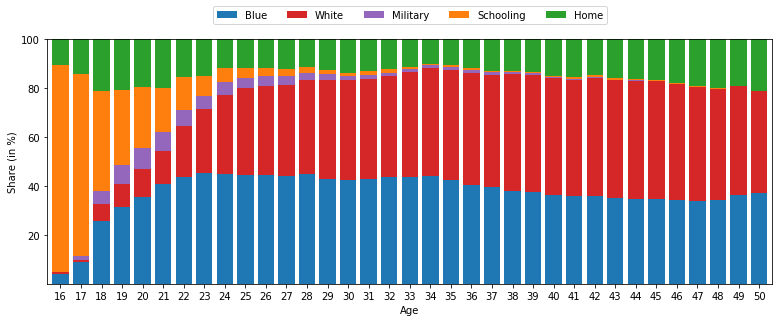

In [7]:
plot_decisions_by_age(df)

### Wages

We reproduce the average real wages by occupation.

In [8]:
get_average_wages(df)

,Blue,Military,White,All
Age,,,,
16,"9,648.17","8,509.16","12,301.07","9,906.16"
17,"11,145.03","9,176.57","9,237.11","10,682.12"
18,"12,019.30","9,765.11","12,050.71","11,689.59"
19,"13,193.31","9,546.65","12,517.79","12,418.06"
20,"14,605.61","10,795.39","14,054.15","13,828.85"
21,"15,578.51","12,358.96","15,555.31","15,143.44"
22,"16,840.68","14,346.82","20,298.33","17,584.39"
23,"18,236.01","15,466.69","21,343.24","19,142.84"
24,"19,015.47","17,777.53","22,513.52","20,324.77"


The following figures illustrate the average wages in the civilian and non-civilian occupations. Average wages follow a generally increasing trend which is much steeper for white-collar jobs than for blue-collar jobs. As the computation of military wages requires annual information but the NLSY79 only provides biannual data on military incomes, military wages are only available until the age of 31.

The unconditional standard deviation of wages is lowest in the military, and highest for white-collar occupations.

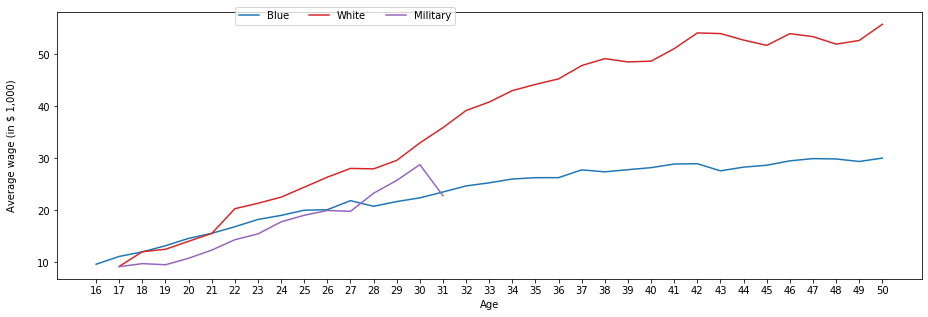

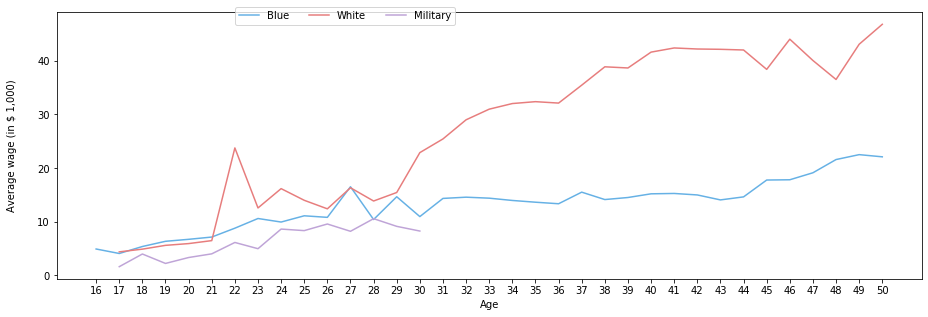

In [9]:
plot_wage_moments(df, savgol=False)

### Initial Schooling

In [10]:
get_initial_schooling(df)[0]

,Years,Number,Frequency
0,7,13,0.01
1,8,52,0.04
2,9,278,0.20
3,10,931,0.67
4,11,109,0.08
5,12,1,0.00


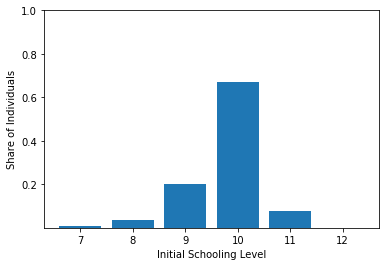

In [11]:
plot_initial_schooling(get_initial_schooling(df)[1])

In [12]:
get_initial_schooling_activity(df)

,7,8,9,10,11,12
Blue,16.65,18.13,14.78,13.73,13.38,15.74
White,2.70,2.07,3.70,6.67,7.93,8.44
Military,0.00,0.02,0.66,0.63,0.71,1.20
School,0.08,0.22,0.50,1.65,2.09,2.35
Home,12.66,10.62,10.88,7.71,6.09,3.58
Total,32.09,31.07,30.52,30.40,30.21,31.31


The amount of schooling an individual obtains is an important determinant for life cycle decisions (cite some work?). The following table illustrates the years spent on each activity by initial level of schooling. Some patterns emerge:


- Years spent in blue-collar occupations generally decrease with the initial level of schooling. While individuals with 7 years of initial schooling work on average 16.65 in a blue-collar occupation, individuals that have 11 years of schooling spend only 13.38 years in a blue-collar occupation.    


- Years spent in white-collar occupations increase with the initial level of schooling. In particular, individuals with only 7 years of schooling spend on average merely 2.7 years in white-collar jobs while individuals with 11 years of schooling spend on average 7.93 in white-collar ocucpations.



- The initial level of schooling is a strong predictor for additional schooling. While individuals who enter the model with only 7 years of schooling do not even spend 2 more month in school (on average), those with 11 years of initial schooling add on average 2.1 years. 


Notably, the descriptives are derived under the instance that the average duration of individuals in the sample differs by the level of initial schooling. Individuals with 7 years of initial schooling are observed for 32.09 periods, while individuals with 11 years of initial schooling are only observed for 30.21 years.

### Transition Matrix

We will illustrate two directions of transition probabilities:
- `origin_to_destination`  
Percentage of individuals who are in an originating alternative in $t$ (column) and will be in a destination alternative in $t+1$ (row). 
    * *Example 1:* 60% of the time, an individual who is in school currently, will be in the school the next year.   
    * *Example 2:* 8% of the time, an individual who is in a blue-collar occupation currently, will be in a white-collar occupation next year.   


- `destination_from_origin`   
Percentage of individual who are in a destinating alternative in $t$ (column) and were in a certain originating alternative in $t-1$ (row).
    * *Example 1:* 81% of the time, an individual who is in school at $t$ was also in school in $t-1$.
    * *Example 1:* 9% of the time, an individual who is employed in a white-collar occupation at $t$ worked in a blue-collar occupation in $t-1$.

In [13]:
get_df_transition_probabilities(make_transition_matrix(df), "origin_to_destination")

,Blue,White,Military,Schooling,Home
Blue,0.82,0.08,0.00,0.01,0.09
White,0.08,0.87,0.00,0.01,0.04
Military,0.09,0.04,0.81,0.03,0.04
Schooling,0.13,0.12,0.02,0.60,0.13
Home,0.26,0.10,0.01,0.05,0.58


In [14]:
get_df_transition_probabilities(make_transition_matrix(df), "destination_from_origin")

,Blue,White,Military,Schooling,Home
Blue,0.79,0.07,0.01,0.04,0.10
White,0.09,0.83,0.00,0.04,0.04
Military,0.04,0.01,0.80,0.08,0.06
Schooling,0.05,0.06,0.01,0.81,0.08
Home,0.23,0.10,0.01,0.10,0.57


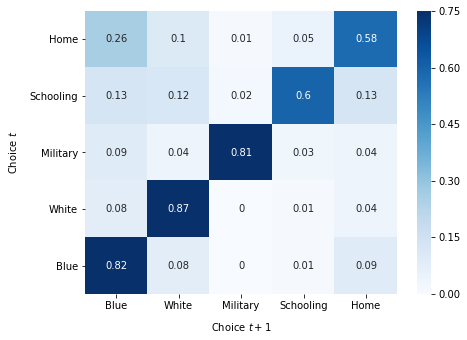

In [15]:
plot_transition_heatmap(make_transition_matrix(df))

**Some Facts**

The diagonal indicates that choices are highly persistent. There is limited mobility between white and blue collar occupations and individuals transition from white-collar to blue-collar and vice versa at equal rates. Blue-collar workers are twice more likely to transition into home than white-collar workers. Individuals who are not in school are highly unlikely to return to school.